## A/B Test Aggregated Data
Simulated user-aggregated data from an experiment with webpage views and button clicks attributes.

### URL dataset origin: https://www.kaggle.com/datasets/sergylog/ab-test-aggregated-data/data

In [28]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Carregando Dados

In [29]:
df = pd.read_csv('ab_test_results_aggregated_views_clicks_2.csv')
df.head()

,user_id,group,views,clicks
0,1,control,10.0,0.0
1,2,control,1.0,0.0
2,3,control,1.0,0.0
3,4,control,2.0,0.0
4,5,control,3.0,0.0


In [30]:
df.tail

<bound method NDFrame.tail of         user_id    group  views  clicks
0             1  control   10.0     0.0
1             2  control    1.0     0.0
2             3  control    1.0     0.0
3             4  control    2.0     0.0
4             5  control    3.0     0.0
...         ...      ...    ...     ...
119995   119996     test    9.0     0.0
119996   119997     test    2.0     1.0
119997   119998     test   20.0     1.0
119998   119999     test    6.0     1.0
119999   120000     test    2.0     0.0

[120000 rows x 4 columns]>

In [31]:
df.shape

(120000, 4)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  120000 non-null  int64  
 1   group    120000 non-null  object 
 2   views    120000 non-null  float64
 3   clicks   120000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


### Análise Exploratória

In [33]:
df.describe()

,user_id,views,clicks
count,120000.000000,120000.000000,120000.000000
mean,60000.500000,4.991075,0.182692
std,34641.160489,5.915200,0.472547
min,1.000000,1.000000,0.000000
25%,30000.750000,2.000000,0.000000
50%,60000.500000,3.000000,0.000000
75%,90000.250000,6.000000,0.000000
max,120000.000000,205.000000,9.000000


In [34]:
## Verificando Dados Ausentes por coluna
df.isnull().sum().sort_values(ascending = False)

user_id    0
group      0
views      0
clicks     0
dtype: int64

In [35]:
# Verificando valores nulos por coluna
df.isna().sum().sort_values(ascending = False)

user_id    0
group      0
views      0
clicks     0
dtype: int64

In [36]:
## Verifica Dados faltantes
df[df.duplicated()]

,user_id,group,views,clicks


In [ ]:
## Verifica Outliers?

Grupo de controle representa a versão sem alterações.
Grupo de teste representa a versão modificada para ser testada.

In [37]:
## Verificando Distribuição de Grupo
print(df['group'].value_counts())

group
control    60000
test       60000
Name: count, dtype: int64


In [38]:
#Plots
# Set up the plot style
sns.set(style='whitegrid')

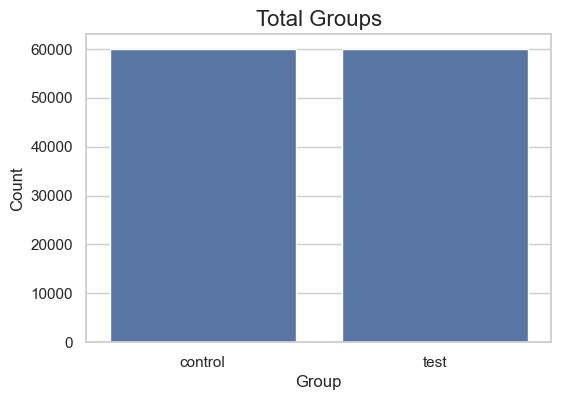

In [39]:
#Visualização gráfica dos grupos
plt.figure(figsize=(6, 4))
sns.countplot(data = df, x = 'group')
plt.title('Total Groups', fontsize=16)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Taxa de CTR (Click-Through Rate) = taxa de cliques em um anúncio em relação ao número de vezes que ele foi exibido

In [40]:
## Calculo CTR
df['ctr'] = df['clicks']/df['views']*100 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  120000 non-null  int64  
 1   group    120000 non-null  object 
 2   views    120000 non-null  float64
 3   clicks   120000 non-null  float64
 4   ctr      120000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.6+ MB


In [41]:
## Media do CTR e Taxa por grupo
ctr_means = df.groupby('group').mean().reset_index()[['group', 'ctr']]
print(ctr_means)

     group       ctr
0  control  3.465443
1     test  3.864758


### Testes Estatísticos

#### Shapiro - Normalidade

In [ ]:
### Suposição da Normalidade
## Shapiro
shapiro(df.loc[df.group == 'test', 'clicks'])

ShapiroResult(statistic=0.4386280546163942, pvalue=1.6542150041050422e-150)

In [43]:
shapiro(df.loc[df.group == 'control', 'clicks'])

ShapiroResult(statistic=0.4186069578403544, pvalue=1.2875188690553203e-151)

H0 é rejeitado porque o valor p é <0,05. A suposição de normalidade não foi fornecida.

#### Mann-Whitney U Test

Portanto, utilizaremos o teste U de Mann-Whitney.

H0: Não há diferença significativa entre os dois grupos em termos de taxa de cliques na página desejada.

H1: Há uma diferença.

In [44]:
mannwhitneyu(df.loc[(df.group == 'test'), 'clicks'], 
             df.loc[(df.group == 'control'), 'clicks'])

MannwhitneyuResult(statistic=1827378002.0, pvalue=3.362997071095112e-13)

H0 é rejeitado porque valor de p<0,05. Em outras palavras, podemos dizer estatisticamente que existe uma diferença entre os dois grupos